In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jangr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
# Load the dataset
df = pd.read_csv('mental_health.csv')  # Change this to your file path

In [5]:
# Check dataset structure
print(df.head())

                                                text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1


In [6]:
# Rename columns if necessary
df.columns = ['text', 'label']

C:\Users\Jangr\AppData\Local\Temp\ipykernel_18836\2737385601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


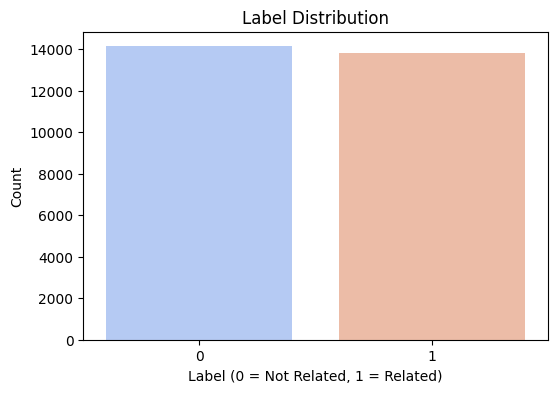

In [7]:
# Display class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title("Label Distribution")
plt.xlabel("Label (0 = Not Related, 1 = Related)")
plt.ylabel("Count")
plt.show()


In [8]:
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [9]:
# Apply preprocessing
df['text'] = df['text'].apply(preprocess_text)


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])


In [14]:
# Convert text to TF-IDF BEFORE applying SMOTE
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)  # Convert text to numerical form
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE on numerical TF-IDF features
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)




In [15]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train_resampled)
X_test_tfidf = vectorizer.transform(X_test)

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [16]:
# Train the model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_tfidf, y_train_resampled)

ValueError: Found input variables with inconsistent numbers of samples: [22381, 22622]

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Related', 'Related'], yticklabels=['Not Related', 'Related'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Function for Predicting Custom Text
def predict_message(text):
    text = preprocess_text(text)  # Preprocess input
    text_tfidf = vectorizer.transform([text])  # Transform input
    prediction = model.predict(text_tfidf)[0]  # Predict
    return "Related to Mental Health" if prediction == 1 else "Not Related to Mental Health"

In [ ]:
# Example input test
user_input = "I've been feeling really anxious and stressed lately."
print("Prediction:", predict_message(user_input))